In [227]:
from __future__ import print_function, division
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as mplib
import math
import thinkdsp
import thinkplot
from array import array
from itertools import chain, repeat
import copy

%matplotlib inline

In [228]:
sig1 = thinkdsp.SinSignal(freq=500, amp = 1.5, offset = 0)
wav1 = sig1.make_wave(duration = 1,framerate=11025)

sig2 = thinkdsp.SinSignal(freq=1500, amp = 1.5, offset = 0)
wav2 = sig2.make_wave(duration = 1,framerate=11025)


In [229]:
def generate_tonal_sig(bits,symbol_len):
    transmit = thinkdsp.SinSignal(freq = 500, amp = 1.5,offset=0)
    audio = transmit.make_wave(duration = symbol_len)
    for bit in bits:
        if bit == 0:
            sig = thinkdsp.SinSignal(freq=500, amp = 1.5, offset = 0)
        if bit == 1:
            sig = thinkdsp.SinSignal(freq=1500, amp = 1.5, offset = 0)
        new_wav = sig.make_wave(duration = symbol_len)
        audio = audio | new_wav
    return audio

trans = generate_tonal_sig([0,1,0,0,0,1],.5)
trans.make_audio()
wfile = thinkdsp.WavFileWriter('receivedfile.wav')
wfile.write(trans)
wfile.close()

499.86398259
499.86398259
509.861262242
499.86398259
499.86398259
499.86398259
491.866158868


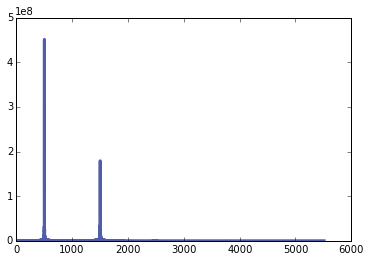

In [230]:
zeroHighCutoff = 510

zeroLowCuttoff = 490

wave = thinkdsp.read_wave('receivedfile.wav')

spectrum = wave.make_spectrum()

wave.make_audio()

windowSize = 0.5

results = []

for i in range(0, int(round(wave.duration / windowSize))):
    segment = wave.segment(i * windowSize, windowSize)
    segmentSpectrum = segment.make_spectrum()
    segmentSpectrum.low_pass(510)
    segmentSpectrum.high_pass(490)
    firstMaxFrequencyValue = segmentSpectrum.fs[np.argmax(segmentSpectrum.amps)]
    amplitude = max(segmentSpectrum.amps) / 2000
    
    print(firstMaxFrequencyValue)
    if amplitude > 1:
        results.append(0)
    else:
        results.append(1)

spectrum.plot()


b3:a5:51:a7:57:12:9d:34:47:18


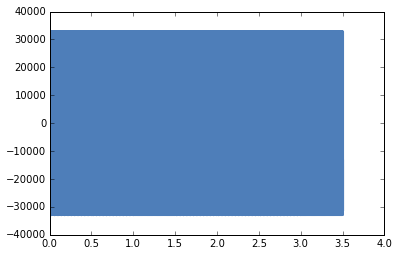

In [231]:
np.random.seed(1000)

bytes = np.random.bytes(10)


stri = ":".join("{:02x}".format(ord(c)) for c in bytes)

print(stri)
segment2 = wave.segment(0, wave.duration)
x = segment2.ys
y = [ 0 for i in xrange(len(segment2.ys))]
q = .99
wo = (500 * np.pi * 2) / segment2.framerate

y[0] = x[0] + 2 * q - 2

y[1] = x[1] + 2 * q * np.cos(wo) * y[0] - 2 * np.cos(wo) * x[0]

for i in range(2, len(segment2.ys)):
    y[i] = x[i] + 2*q*np.cos(wo) * y[i-1] - q*q*y[i - 2] - 2 * np.cos(wo) * x[i-1] + x[i - 2]
    
newwave = thinkdsp.Wave(y, segment2.framerate)
segment2.plot()


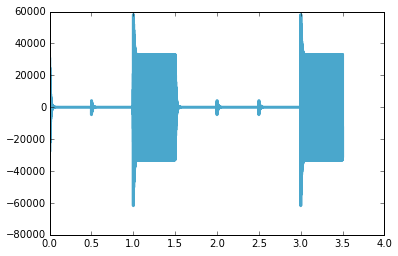

In [232]:
newwave.plot()

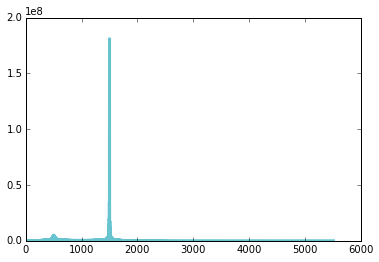

In [233]:
newspec = newwave.make_spectrum()
newspec.plot()